<a href="https://colab.research.google.com/github/NaianeG/Previs-oGravidadeAcidente/blob/main/Previs%C3%A3oGravidadeAcidente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

In [ ]:
import pandas as pd
from datetime import datetime, date
from matplotlib import pyplot as plt
from scipy import stats
from patsy import dmatrices
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importação dos Dados e Criação de Variáveis
**negrito**




In [ ]:
dataset_dados = pd.read_excel('RTA_Dataset.xlsx')

In [ ]:
dataset_dados = dataset_dados[["age_1", "age_2", "Sex_of_driver_1", "Driving_experience_1", "Road_surface_conditions", "Weather_conditions", "Accident_severity", "Day_of_week", "Educational_level" ]]

In [ ]:
dataset_dados.head()

,age_1,age_2,Sex_of_driver_1,Driving_experience_1,Road_surface_conditions,Weather_conditions,Accident_severity,Day_of_week,Educational_level
0,18.0,30.0,1,2.0,Dry,Normal,Slight Injury,Monday,Above high school
1,31.0,50.0,1,10.0,Dry,Normal,Slight Injury,Monday,Junior high school
2,18.0,30.0,1,2.0,Dry,Normal,Serious Injury,Monday,Junior high school
3,18.0,30.0,1,NaN,Dry,Normal,Slight Injury,Sunday,Junior high school
4,18.0,30.0,1,3.0,Dry,Normal,Slight Injury,Sunday,Junior high school


In [ ]:
dataset_dados['Accident_severity'] = dataset_dados['Accident_severity'].replace({
    'Serious Injury': 0,
    'Slight Injury': 1,
    'Fatal injury': 2
})

In [ ]:
dataset_dados.head()

,age_1,age_2,Sex_of_driver_1,Driving_experience_1,Road_surface_conditions,Weather_conditions,Accident_severity,Day_of_week,Educational_level
0,18.0,30.0,1,2.0,Dry,Normal,1,Monday,Above high school
1,31.0,50.0,1,10.0,Dry,Normal,1,Monday,Junior high school
2,18.0,30.0,1,2.0,Dry,Normal,0,Monday,Junior high school
3,18.0,30.0,1,NaN,Dry,Normal,1,Sunday,Junior high school
4,18.0,30.0,1,3.0,Dry,Normal,1,Sunday,Junior high school


In [ ]:
dataset_dados = dataset_dados.fillna(0)

In [ ]:
dataset_dados = pd.get_dummies(dataset_dados, columns=['Road_surface_conditions', 	'Weather_conditions', 'Educational_level', 'Day_of_week'])

In [ ]:
dataset_dados.head()

,age_1,age_2,Sex_of_driver_1,Driving_experience_1,Accident_severity,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Weather_conditions_Cloudy,...,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,18.0,30.0,1,2.0,1,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,31.0,50.0,1,10.0,1,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,18.0,30.0,1,2.0,0,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,18.0,30.0,1,0.0,1,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,18.0,30.0,1,3.0,1,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
x = dataset_dados.drop(columns=["Accident_severity"]).copy()

y = dataset_dados["Accident_severity"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
eval_set = [(X_test, y_test)]

In [ ]:
y.unique()

array([1, 0, 2])

In [ ]:
model = XGBClassifier(verbosity=0, learning_rate=0.01, max_depth=3, n_estimators=10000, n_jobs=-1, random_state=1,
                    min_child_weight=1, gamma = 0.0, subsample = 0.6, colsample_bytree = 0.6, scale_pos_weight = 1,
                    reg_alpha= 1e-05, early_stopping_rounds=10, eval_metric='auc')
model.fit(X_train, y_train, eval_set=eval_set, verbose = 1)

[0]	validation_0-auc:0.52314
[1]	validation_0-auc:0.55277
[2]	validation_0-auc:0.56085
[3]	validation_0-auc:0.56367
[4]	validation_0-auc:0.56508
[5]	validation_0-auc:0.56391
[6]	validation_0-auc:0.56365
[7]	validation_0-auc:0.55818
[8]	validation_0-auc:0.55939
[9]	validation_0-auc:0.55935
[10]	validation_0-auc:0.55661
[11]	validation_0-auc:0.55556
[12]	validation_0-auc:0.55517
[13]	validation_0-auc:0.55442
[14]	validation_0-auc:0.55250


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

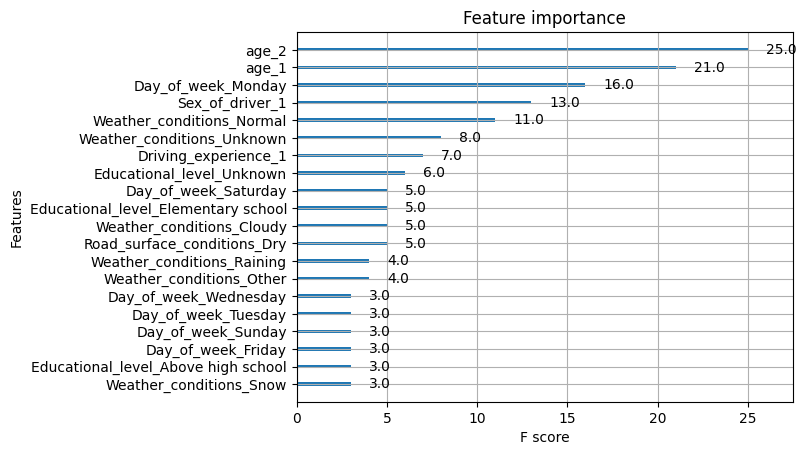

In [ ]:
plot_importance(model, max_num_features=20)

##### Resultados de Jogos

In [ ]:
score = model.score(X_train, y_train)
score

0.8476451481932602

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value, 2) for value in y_pred]
len(predictions)

2464

In [ ]:
def taxa_erro (valores_reais, valores_previstos):
    #RMSE
    rmse = sqrt(mean_squared_error(valores_reais, valores_previstos))
    print('Erro médio quadrático: ', rmse)

    mae = mean_absolute_error(valores_reais, valores_previstos)
    print('Erro médio absoluto: ', mae)

In [ ]:
taxa_erro(y_test, predictions)

Erro médio quadrático:  0.40291148201269017
Erro médio absoluto:  0.16233766233766234


In [ ]:
x.head(3)

,age_1,age_2,Sex_of_driver_1,Driving_experience_1,Road_surface_conditions_Dry,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,...,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,18.0,30.0,1,2.0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,31.0,50.0,1,10.0,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,18.0,30.0,1,2.0,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
model.predict(x.head(3))

array([1, 1, 1])

In [ ]:
y.head(3)

,Accident_severity
0,1
1,1
2,0
